In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [27]:
import numpy as np

In [28]:
from lint_analysis.bin_counts import cache

In [29]:
tokens = cache.token_counts(10000)

In [30]:
import re

from collections import OrderedDict

tokens = OrderedDict([
    (t, c) for t, c in tokens.items()
    if not re.match('^[0-9ivx.]+$', t)
])

In [31]:
data = []

for i, (token, count) in enumerate(tokens.items()):
    
    series = cache.token_series(token)
    exp_var = series.sum() * (1/100) * (1 - 1/100)
    
    data.append((count, series.var(), exp_var))
    
    if i % 1000 == 0: print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [32]:
import pandas as pd

df = pd.DataFrame(
    data,
    columns=('count', 'var', 'exp'),
    index=tokens.keys(),
)

In [33]:
import math

df['score'] = df.index.map(
    lambda t: df.loc[t]['var'] / df.loc[t]['exp']
)

In [21]:
list(tokens.keys())[:100]

[',',
 '.',
 'the',
 'and',
 'to',
 'of',
 'a',
 '”',
 'i',
 'in',
 'he',
 'was',
 'that',
 'it',
 'his',
 'you',
 'her',
 'she',
 'had',
 '“',
 'with',
 'for',
 'as',
 '?',
 'but',
 'at',
 'on',
 'not',
 'is',
 'him',
 'be',
 ';',
 'have',
 'said',
 'my',
 'me',
 'from',
 '!',
 'they',
 '"',
 'all',
 'this',
 'were',
 'would',
 'so',
 'one',
 'by',
 'what',
 'there',
 'if',
 'out',
 'when',
 'up',
 'we',
 'been',
 'an',
 'could',
 'which',
 'no',
 'do',
 'them',
 'or',
 '¬',
 'did',
 'then',
 'who',
 'their',
 'are',
 'your',
 'will',
 'into',
 'about',
 'like',
 'n’t',
 'now',
 'more',
 'know',
 'man',
 'time',
 'some',
 'over',
 'little',
 'down',
 'back',
 '’',
 'see',
 'only',
 'than',
 '—',
 'before',
 'just',
 ':',
 'very',
 'can',
 'here',
 'any',
 'after',
 'how',
 'well',
 'go']

In [14]:
def plot_cohort(tokens, w=8, h=8):
    
    if type(tokens) is not list:
        tokens = tokens.splitlines()
    
    plt.figure(figsize=(w, h))
    
    lines = []
    for token in tokens:
        
        series = cache.token_series(token)
        line, = plt.plot(series/series.sum(), label=token)
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')
    plt.show()

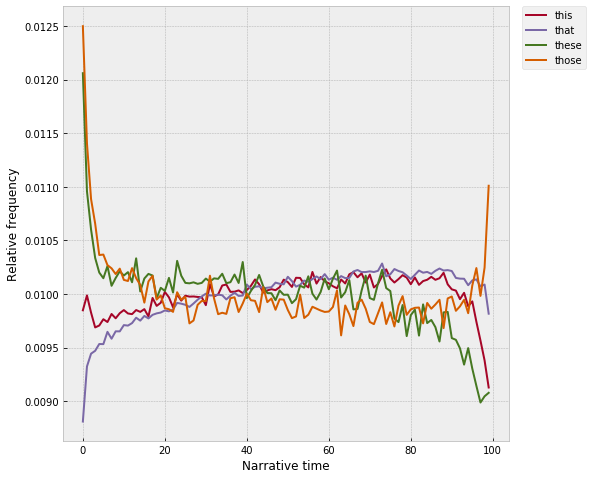

In [16]:
plot_cohort('''
this
that
these
those
''')

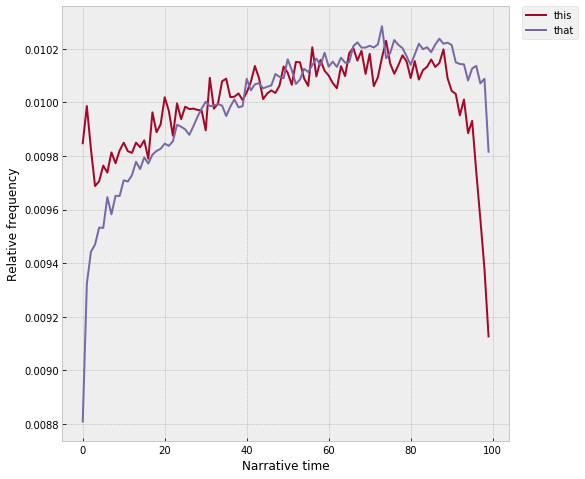

In [23]:
plot_cohort('''
this
that
''')

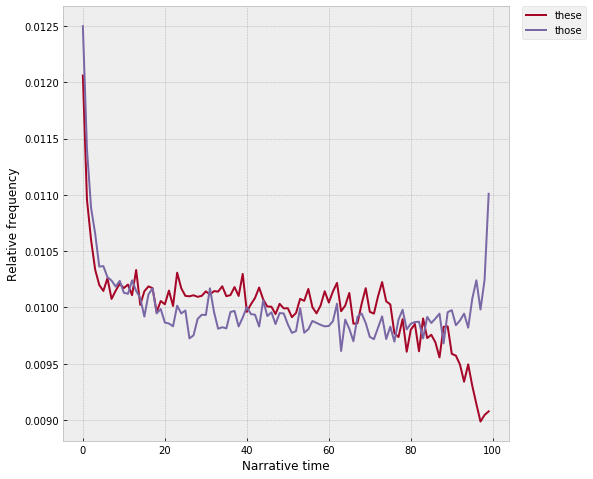

In [24]:
plot_cohort('''
these
those
''')

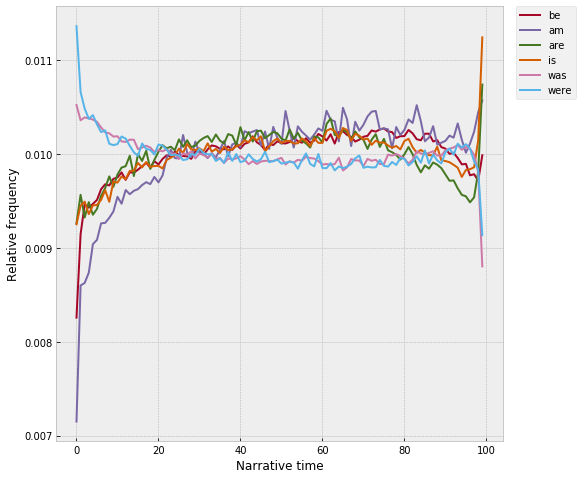

In [17]:
plot_cohort('''
be
am
are
is
was
were
''')

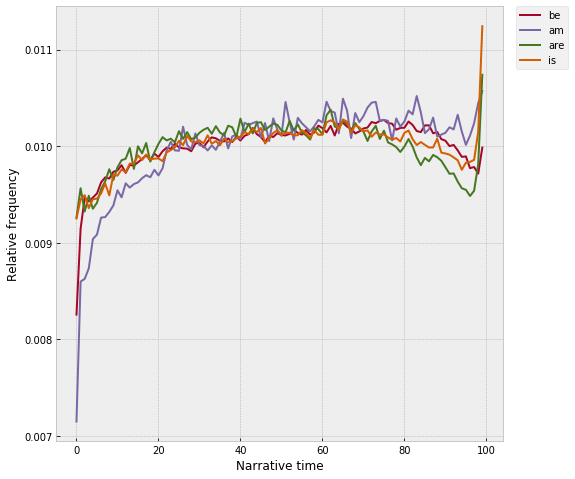

In [6]:
plot_cohort('''
be
am
are
is
''')

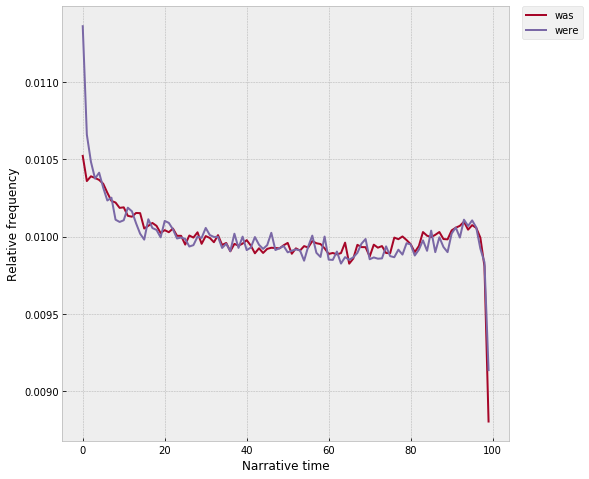

In [7]:
plot_cohort('''
was
were
''')